<a href="https://colab.research.google.com/github/ZachPetroff/Babybot/blob/master/examples/Reward_Fluctuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code can be used to add a folder in the repository to the Python import
# path, irrespective of whether the notebook is being run in colab or Jupyter.
# (C) 2020 Abe Leite, Indiana University Bloomington
# This code block is released under MIT license. Feel free to make use of
# this code in any projects so long as you reproduce this text.

import os
import sys
import subprocess

repo_URL = 'https://github.com/ZachPetroff/Babybot'
repo_name = repo_URL.split('/')[-1]
code_folder = ''

try:
  repo_path = subprocess.check_output('git rev-parse --show-toplevel', shell=True).decode().strip()
except subprocess.CalledProcessError:
  os.system(f'git clone {repo_URL} --depth 1')
  repo_path = os.path.abspath(repo_name)

code_path = os.path.join(repo_path, code_folder)
sys.path.append(code_path)
print(f'Loading code from {code_path}')

Loading code from /content/Babybot/


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import main
import graph
import simulation

# Biological Reference
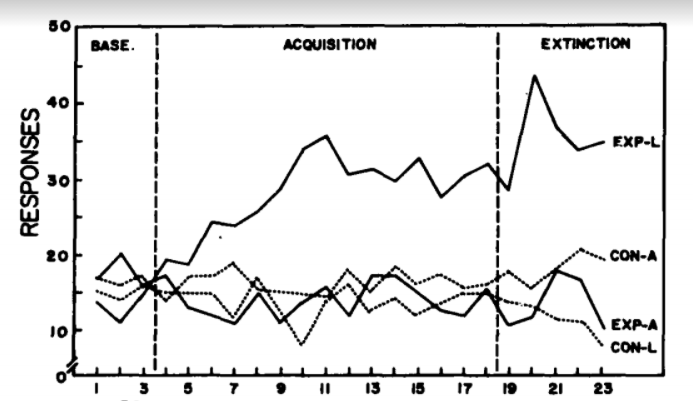

# Fluctuating Reward
Because the audio-visual reward received by the infant is presumably not static, this notebook was created to display the outcome of allowing the reward to be randomized. The reward was based on a normal distribution, the center being the ```reward```. In the Mobile-Dynamics model, the width of the normal distribution was decided by the ```mobile_window```, which designates the average window of time the mobile moves for. This value was chosen to represent the width, because there is an apparent correlation that can be inferred between how long the mobile moves and the reward the infant receives. For the expectation model, a parameter designated ```reward_flux``` was created to describe the width of the normal distribution.



In [ ]:
reward = 6e-2 #@param
cost = 3e-2 #@param
mobile_window = .025 #@param

# simulate, while extracting key values
output = simulation.simulate(rates=[20, 20, 20, 20], reward=reward, reward_flux=.1, cost=cost, mobile_on=True, mobile_window=mobile_window)

# list of extracted information
simulation.display_output(output)

## Mobile Dynamics

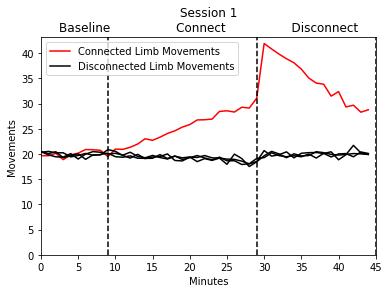

In [ ]:
graph.plot_movements(output["separations"], output["connection changes"], output["minutes"], output["right arm movements"], output["left arm movements"], output["right leg movements"], output["left leg movements"])

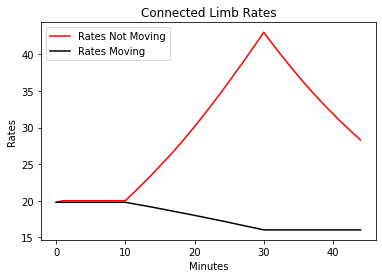

In [ ]:
graph.plot_rates(output["minutes"], output["still mobile rates"], output["moving mobile rates"])

## Violation of Expectation

In [ ]:
reward = .07 #@param
cost = .025 #@param
exp_growth = 2e-4 #@param
exp_decay = 5e-4 #@param
reward_flux = .5 #@param

output = simulation.simulate(rates=[20, 20, 20, 20], reward=reward, reward_flux=reward_flux, cost=cost, 
                             expectation_growth=exp_growth, expectation_decay=exp_decay)

# list of accessible values
simulation.display_output(output)

separations
connection changes
minutes
right arm movements
left arm movements
right leg movements
left leg movements
reward
right arm expectations
left arm expectations
right leg expectations
left leg expectations
still mobile rates
moving mobile rates
connect limb movements per timestep
mobile movements per timestep
timestep


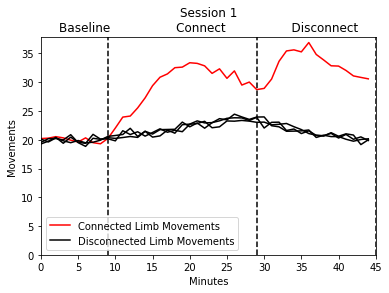

In [ ]:
graph.plot_movements(output["separations"], output["connection changes"], output["minutes"], output["right arm movements"], output["left arm movements"], output["right leg movements"], output["left leg movements"])

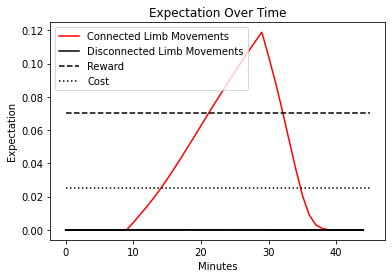

In [ ]:
graph.plot_expectation(output["minutes"], reward, cost, output["right arm expectations"], output["left arm expectations"], output["right leg expectations"], output["left leg expectations"], 0)

# Discussion
From the plots above, one can see that not much changes when allowing the reward to fluctuate. The most notable difference occurs with the disconnected limbs. This may be more noticeable than the change in connected limb movements, because in the original models, the disconnected movements were more-or-less straight lines. 